In [44]:
import numpy as np

from nn.module import Linear,TanH,Sigmoide,Softmax
from nn.loss import CElogSoftMax,MSELoss,CELoss,BCELoss
from tools.nntools import Sequentiel, Optim
from tools.basic import load_usps, show_image,draw_pred
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf


In [45]:
def onehot(x): # single digit
    out = [0] * 10
    out[x] = 1
    return out



    
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255


X_train = X_train[:5000]
y_train = y_train[:5000]
X_test = X_train[:1000]
y_test = y_train[:1000]


In [49]:
y_test[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [47]:
y_train = np.asarray([onehot(x) for x in y_train])

In [51]:
y_train[0:5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [41]:

type=2

n = X_train.shape[1]
hidden1 = 128
hidden2 = 64
d = 10


iteration = 100
gradient_step = 1e-4
batchsize = 100

In [42]:
def label_func(x):
    return np.argmax(x,axis=1)

lin_layer = Linear(n, hidden1,type=type)
lin_layer2 = Linear(hidden1, hidden2,type=type)
lin_layer3 = Linear(hidden2, d,type=type)
act_softmax = Softmax()
act_tan = TanH()
act_tan2 = TanH()
loss = CElogSoftMax()

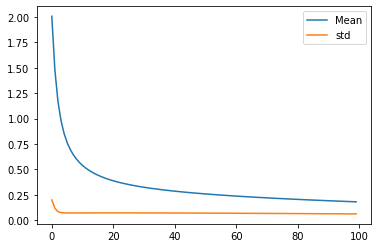

accuracy :  0.94


c:\Users\hider\OneDrive\Bureau\DL\tools\basic.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(nb_pred / 3),3,j)


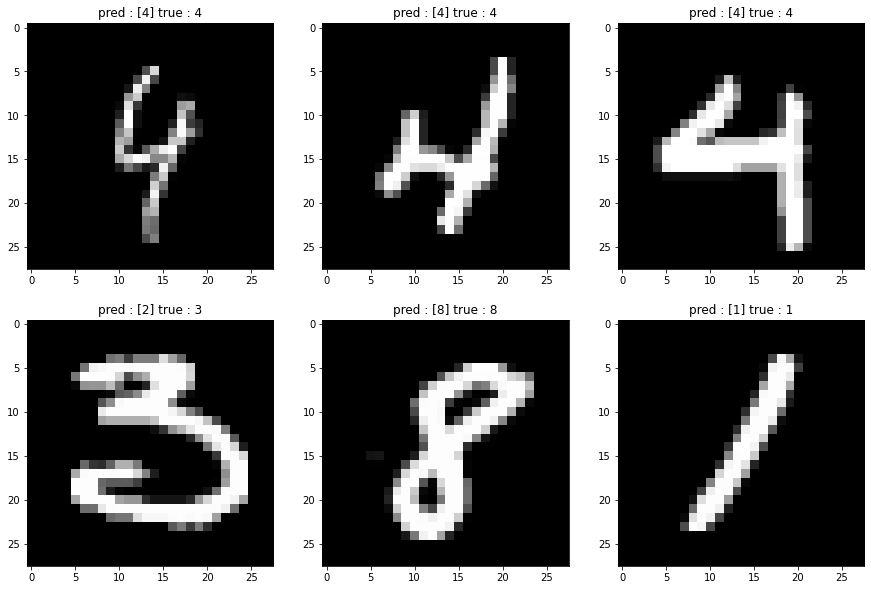

In [43]:
net = Sequentiel([lin_layer,act_tan,lin_layer2,act_tan,lin_layer3],labels=label_func)

opt = Optim(net,loss,eps=gradient_step)
mean, std = opt.SGD(X_train,y_train,batchsize,iteration,earlystop=50)
plt.figure()
plt.plot(mean)
plt.plot(std)
plt.legend(('Mean', 'std'))
plt.show()



print("accuracy : ",opt.score(X_test,y_test))


draw_pred(X_test,y_test,opt._net,6,n=28)

In [ ]:
lin_layer = Linear(n, hidden1,type=type)
lin_layer2 = Linear(hidden1, hidden2,type=type)
lin_layer3 = Linear(hidden2, d,type=type)
act_softmax = Softmax()
act_tan = TanH()
act_tan2 = TanH()
loss = CElogSoftMax()

In [ ]:
net = Sequentiel([lin_layer,act_tan,lin_layer2,act_tan,lin_layer3],labels=label_func)


opt = Optim(net,loss,eps=gradient_step)
mean, std = opt.SGD(X_train,y_train,batchsize,iteration,earlystop=50)